# The Sparks Foundation

## Exploratory Data Analysis - Retail
## As a business manager, try to find out the weak areas where you can work to make more profit.

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv(r'D:\internship\SampleSuperstore.csv')

In [3]:
# checking the shape of the dataset
print("Shape of the dataset:", df.shape)

# checking the first five rows of the dataset
df.head()


Shape of the dataset: (9994, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# checking the data types of the columns
print("Data types of columns:\n", df.dtypes)


Data types of columns:
 Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


In [5]:
# checking the missing values in the dataset
print("\nMissing values in the dataset:\n", df.isnull().sum())


Missing values in the dataset:
 Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [6]:
# checking the duplicat values in the dataset
df.duplicated().sum()

17

In [7]:
#This will give us the count of duplicate rows in the dataset. In this case, there are 17 duplicate rows and we will remove.
df.drop_duplicates(inplace=True)


In [8]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [10]:
df['Ship Mode'].value_counts(normalize=True)

Standard Class    0.596873
Second Class      0.194748
First Class       0.154054
Same Day          0.054325
Name: Ship Mode, dtype: float64

<Axes: xlabel='Category', ylabel='Profit'>

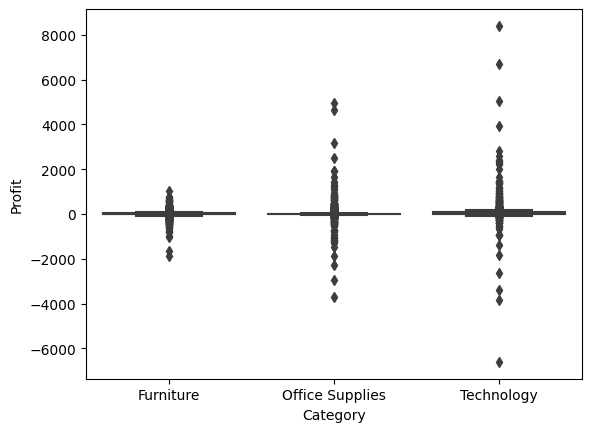

In [11]:
sns.boxplot(x='Category', y='Profit', data=df)

In [12]:
# we will check for any outliers in the numerical columns of the dataset.
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(col, outliers.shape[0])

Sales 1167
Quantity 170
Discount 855
Profit 1881


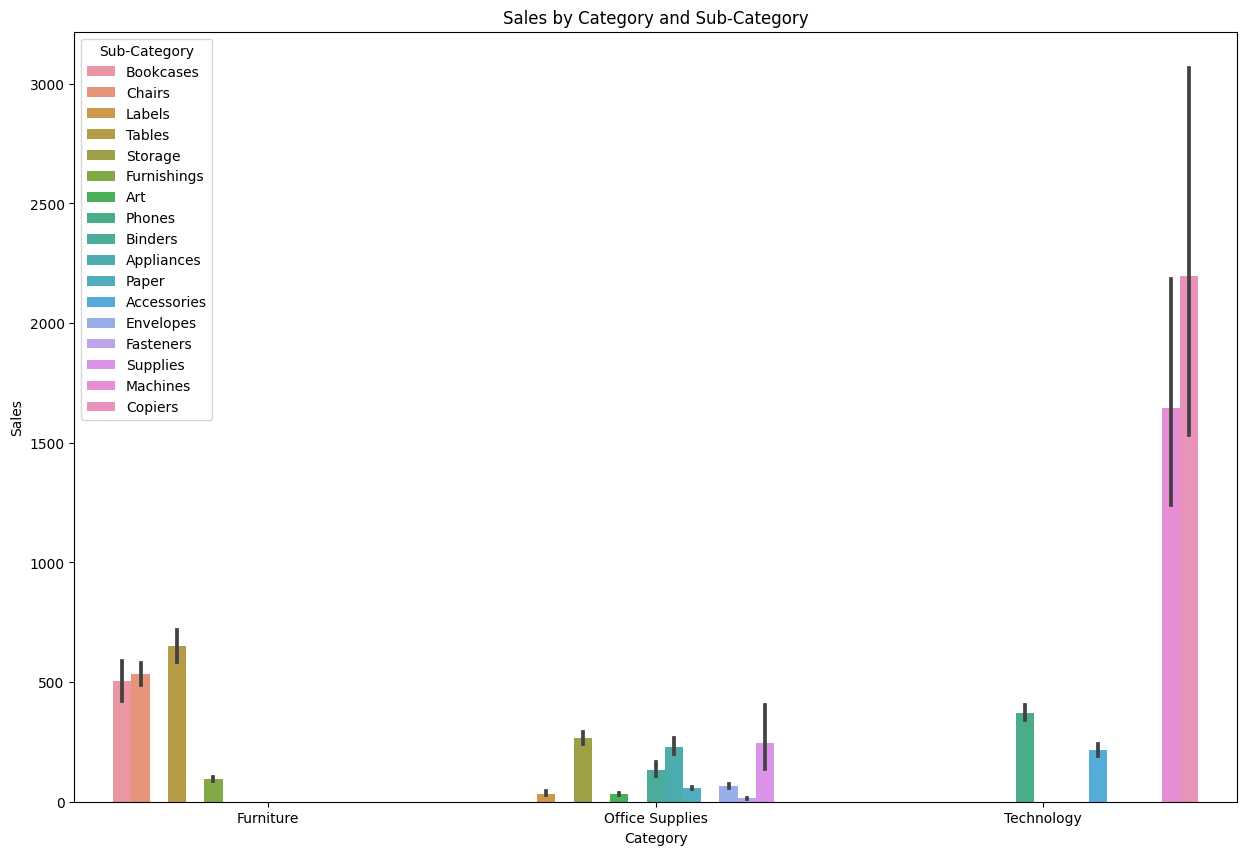

In [13]:
# Plotting Sales by Category and Sub-Category
plt.figure(figsize=(15,10))
sns.barplot(x='Category', y='Sales', hue='Sub-Category', data=df)
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

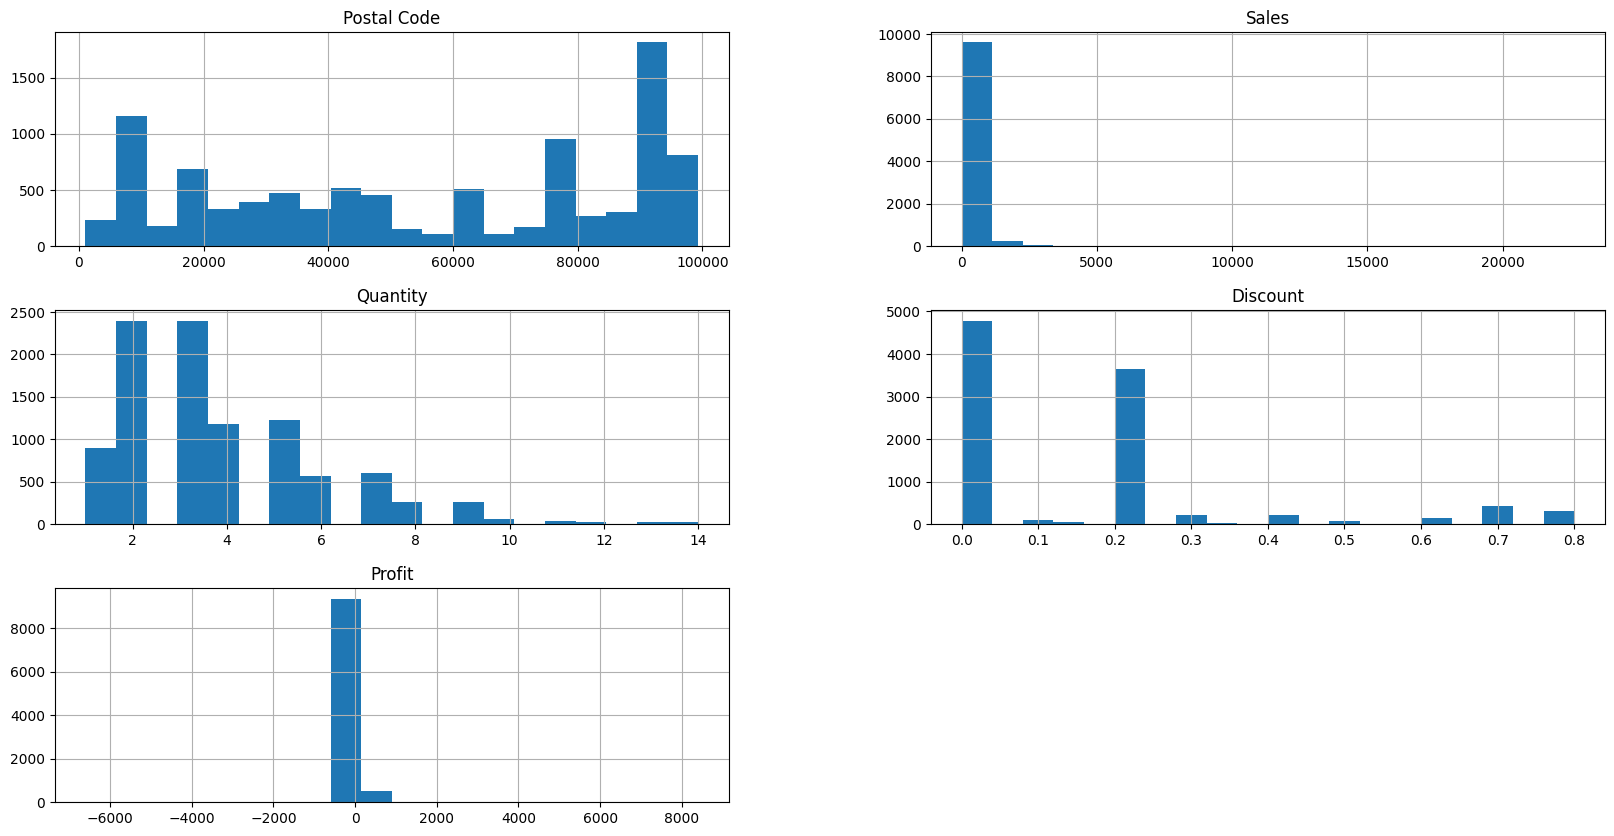

In [14]:
# Plot histograms for all numerical columns
df.hist(bins=20, figsize=(20,10))

# Show the plot
plt.show()

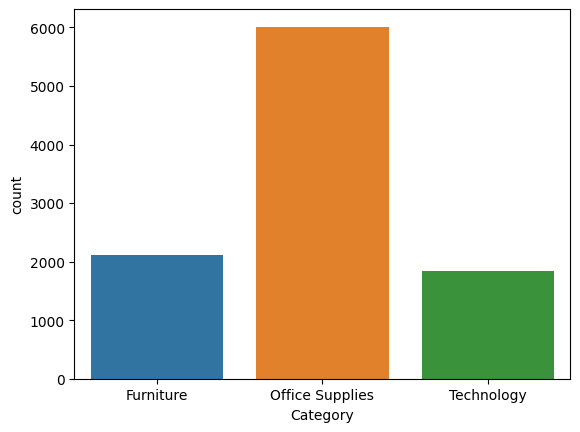

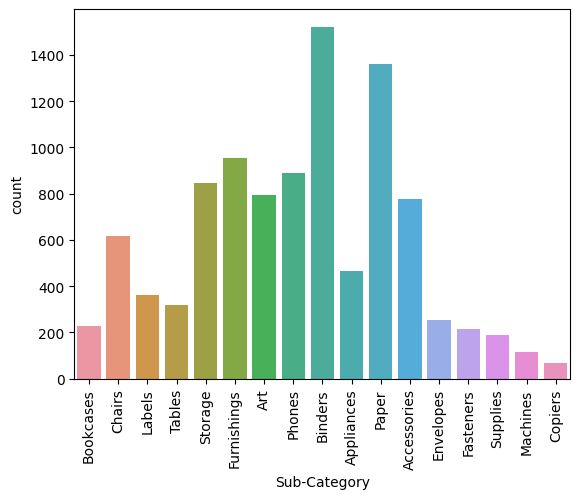

In [15]:

sns.countplot(x="Category", data=df)
plt.show()
plt.xticks(rotation=90)
sns.countplot(x="Sub-Category", data=df,)
plt.show()

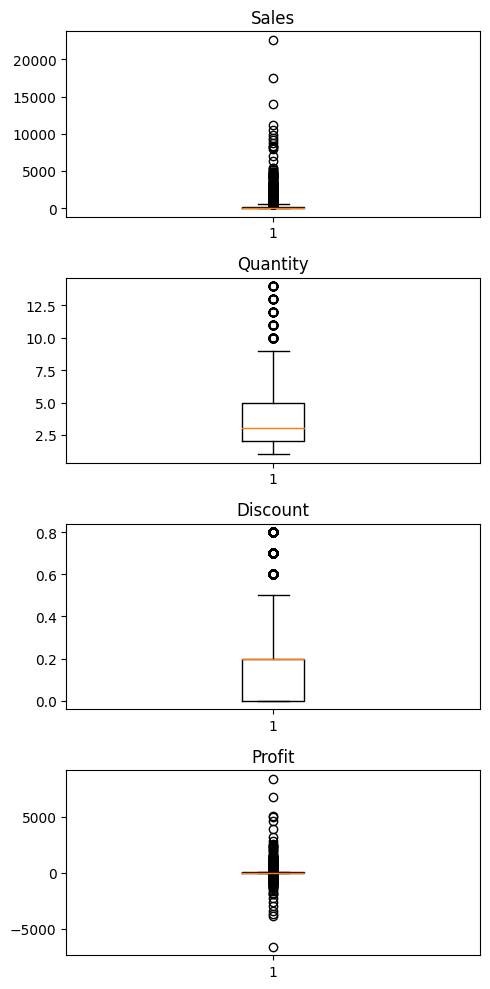

In [16]:
# Box plots of numerical columns
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
fig, ax = plt.subplots(nrows=len(num_cols), figsize=(5,10))

for i, col in enumerate(num_cols):
    ax[i].boxplot(df[col])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

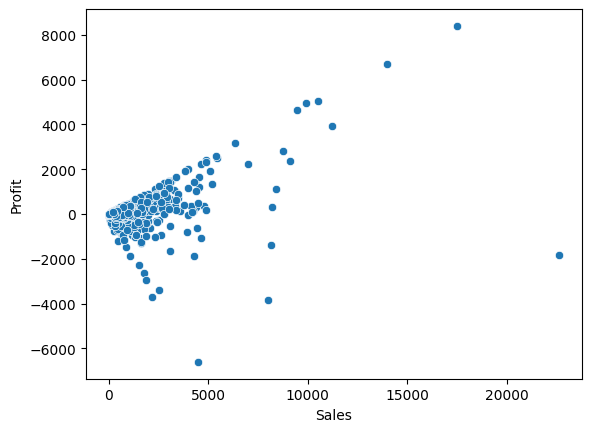

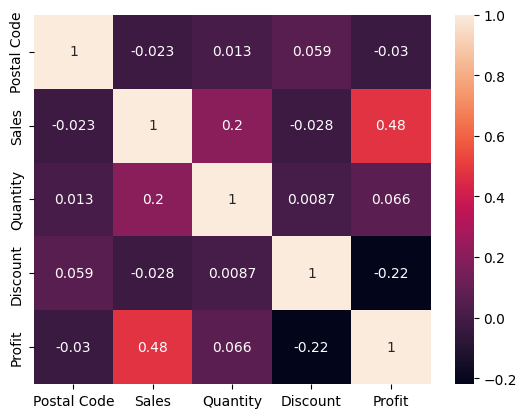

In [17]:
# Scatterplot
sns.scatterplot(x="Sales", y="Profit", data=df)
plt.show()

# Correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.show()

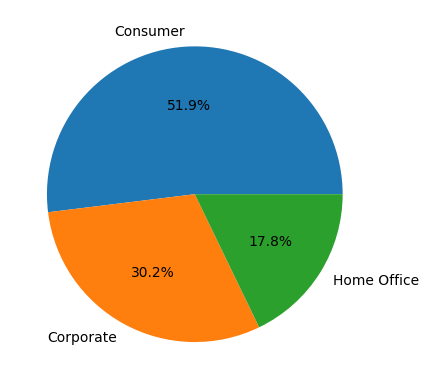

In [18]:
segment_counts = df['Segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%',)
plt.show()

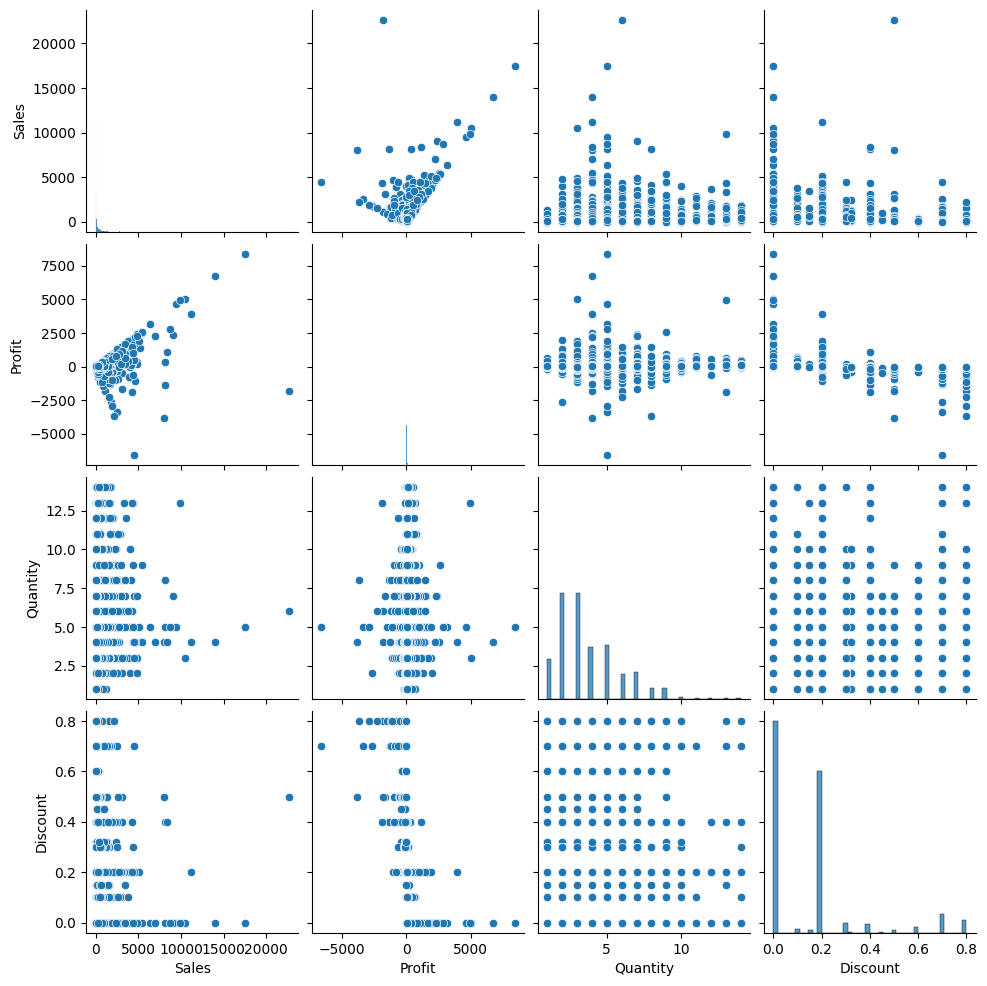

In [19]:
# scatterplot
sns.pairplot(df, vars=['Sales', 'Profit', 'Quantity', 'Discount'])



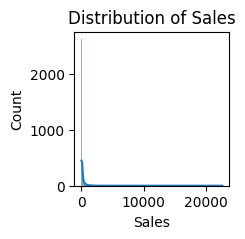

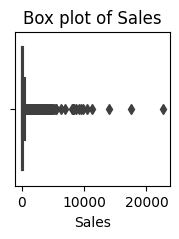

In [20]:
plt.figure(figsize=(2,2))
sns.histplot(data=df, x='Sales', kde=True)
plt.title('Distribution of Sales')
plt.show()

plt.figure(figsize=(2,2))
sns.boxplot(data=df, x='Sales')
plt.title('Box plot of Sales')
plt.show()

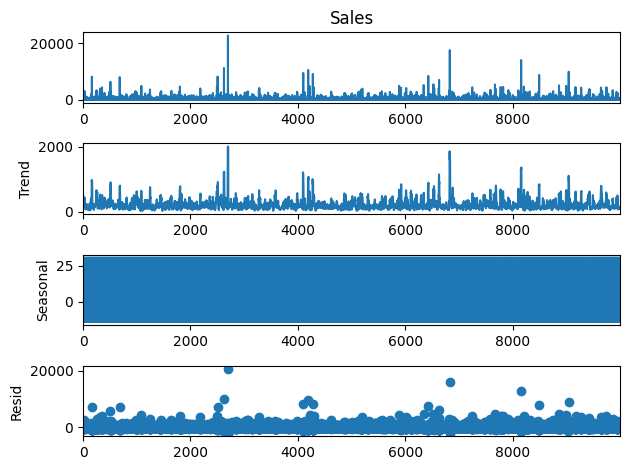

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sales'], model='additive', period=12)
result.plot()
plt.show()

Finding the top profitable products

In [22]:
top_products = df.groupby("Sub-Category").sum().sort_values("Profit", ascending=False)
print(top_products.head(10))

              Postal Code       Sales  Quantity  Discount      Profit
Sub-Category                                                         
Copiers           3873477  149528.030       234      11.0  55617.8249
Phones           47897175  330007.054      3289     137.4  44515.7306
Accessories      44468434  167380.318      2976      60.8  41936.6357
Paper            75446104   78224.142      5144     101.8  33944.2395
Binders          83565745  203409.169      5971     566.2  30228.0003
Chairs           34844773  327777.761      2351     104.7  26567.1278
Storage          46248720  223843.608      3158      63.2  21278.8264
Appliances       25250538  107532.161      1729      77.6  18138.0054
Furnishings      51782325   91683.024      3560     132.4  13052.7230
Envelopes        13325731   16476.402       906      20.4   6964.1767


Finding the top profitable cities

In [23]:
top_cities = df.groupby("City").sum().sort_values("Profit", ascending=False)
print(top_cities.head(10))

               Postal Code       Sales  Quantity  Discount      Profit
City                                                                  
New York City      9158898  256319.041      3413      51.4  62013.8973
Los Angeles       67162851  175831.901      2876      55.5  30431.4267
Seattle           41597330  119460.282      1578      27.8  29121.6825
San Francisco     47621907  112577.172      1920      34.0  17466.1186
Detroit            5497514   42056.974       438       0.8  13146.6935
Lafayette          1914474   25036.200       104       0.0  10018.3876
Jackson            3585856   24963.858       318       2.5   7581.6828
Atlanta            1182402   17197.840       156       0.0   6993.6629
Minneapolis        1274361   16870.540        80       0.0   6824.5846
San Diego         15650880   47521.029       670      13.6   6377.1960


Finding the top profitable states

In [24]:
top_states = df.groupby("State").sum().sort_values("Profit", ascending=False)
print(top_states.head(10))


            Postal Code        Sales  Quantity  Discount      Profit
State                                                               
California    183916115  457576.2715      7649     145.6  76330.7891
New York       11825710  310827.1510      4220      62.4  74015.4622
Washington     49269259  138560.8100      1871      32.4  33368.2375
Michigan       12307876   75879.6440       943       1.8  24428.0903
Virginia        5124335   70636.7200       893       0.0  18597.9504
Indiana         6991602   53555.3600       578       0.0  18382.9363
Georgia         5685480   49095.8400       705       0.0  16250.0433
Kentucky        5725336   36591.7500       523       0.0  11199.6966
Minnesota       4932224   29863.1500       331       0.0  10823.1874
Delaware        1896504   27451.0690       367       0.6   9977.3748


Finding the top profitable segments

In [25]:
top_segments = df.groupby("Segment").sum().sort_values("Profit", ascending=False)
print(top_segments.head(10))

             Postal Code         Sales  Quantity  Discount       Profit
Segment                                                                
Consumer       288269634  1.160833e+06     19497    820.51  134007.4413
Corporate      164108306  7.060701e+05     11591    476.85   91954.9798
Home Office     97903137  4.292927e+05      6732    261.83   60279.0015


Finding the top profitable regions

In [26]:

top_regions = df.groupby("Region").sum().sort_values("Profit", ascending=False)
print(top_regions.head(10))

         Postal Code        Sales  Quantity  Discount       Profit
Region                                                            
West       292783499  725255.6365     12234    350.00  108329.8079
East        50099338  678435.1960     10609    413.50   91506.3092
South       55875052  391721.9050      6209    238.55   46749.4303
Central    151523188  500782.8528      8768    557.14   39655.8752


Finding the top profitable categories

In [27]:

top_categories = df.groupby("Category").sum().sort_values("Profit", ascending=False)
print(top_categories.head(10))

                 Postal Code        Sales  Quantity  Discount       Profit
Category                                                                  
Technology         102603754  836154.0330      6939    244.40  145454.9481
Office Supplies    329670858  718735.2440     22861    946.20  122364.6608
Furniture          118006465  741306.3133      8020    368.59   18421.8137


Finding the top loss-making products

In [28]:

loss_products = df.groupby("Sub-Category").sum().sort_values("Profit", ascending=True)
print(loss_products.head(10))

              Postal Code        Sales  Quantity  Discount      Profit
Sub-Category                                                          
Tables           18607828  206965.5320      1241     83.35 -17725.4811
Bookcases        12771539  114879.9963       868     48.14  -3472.5560
Supplies         10633558   46673.5380       647     14.60  -1189.0995
Fasteners        12506063    3024.2800       914     17.80    949.5182
Machines          6364668  189238.6310       440     35.20   3384.7569
Labels           19458863   12444.9120      1396     25.00   5526.3820
Art              43235536   27107.0320      2996     59.60   6524.6118
Envelopes        13325731   16476.4020       906     20.40   6964.1767
Furnishings      51782325   91683.0240      3560    132.40  13052.7230
Appliances       25250538  107532.1610      1729     77.60  18138.0054


Finding the top loss-making cities

In [29]:

loss_cities = df.groupby("City").sum().sort_values("Profit", ascending=True)
print(loss_cities.head(10))

              Postal Code        Sales  Quantity  Discount      Profit
City                                                                  
Philadelphia     10256182  109061.4610      1978    175.30 -13843.2106
Houston          28898305   64441.2564      1460    142.74 -10175.1755
San Antonio       4614213   21843.5280       247     22.60  -7299.0502
Lancaster         1980720    9891.4640       171     14.50  -7239.0684
Chicago          18976595   48535.9770      1129    119.70  -6648.3318
Burlington         516678   21668.0820       105      3.40  -3622.8772
Dallas           11802703   20131.9322       555     56.30  -2846.5257
Phoenix           5356449   11000.2570       224     22.30  -2790.8832
Aurora            4777612   11656.4780       258     24.00  -2691.7386
Jacksonville      3843200   44713.1830       429     35.85  -2323.8350


Finding the top loss-making states

In [30]:

loss_states = df.groupby("State").sum().sort_values("Profit", ascending=True)
print(loss_states.head(10))

                Postal Code        Sales  Quantity  Discount      Profit
State                                                                   
Texas              75593611  170124.5418      3718    364.24 -25750.9833
Ohio               20536607   77976.7640      1757    152.10 -16959.3178
Pennsylvania       11171445  116496.3620      2150    192.70 -15565.4035
Illinois           29813119   80162.5370      1842    191.10 -12601.6500
North Carolina      6994384   55603.1640       983     70.60  -7490.9122
Colorado           14613828   32108.1180       693     57.60  -6527.8579
Tennessee           6890574   30661.8730       681     53.30  -5341.6936
Arizona            19102126   35282.0010       862     68.00  -3427.9246
Florida            12640225   89473.7080      1379    114.65  -3399.3017
Oregon             11974824   17420.7820       497     35.60  -1194.0993


Finding the top loss-making segments

In [31]:

loss_segments = df.groupby("Segment").sum().sort_values("Profit", ascending=True)
print(loss_segments.head(10))

             Postal Code         Sales  Quantity  Discount       Profit
Segment                                                                
Home Office     97903137  4.292927e+05      6732    261.83   60279.0015
Corporate      164108306  7.060701e+05     11591    476.85   91954.9798
Consumer       288269634  1.160833e+06     19497    820.51  134007.4413


Finding the top loss-making regions

In [32]:

loss_regions = df.groupby("Region").sum().sort_values("Profit", ascending=True)
print(loss_regions.head(10))

         Postal Code        Sales  Quantity  Discount       Profit
Region                                                            
Central    151523188  500782.8528      8768    557.14   39655.8752
South       55875052  391721.9050      6209    238.55   46749.4303
East        50099338  678435.1960     10609    413.50   91506.3092
West       292783499  725255.6365     12234    350.00  108329.8079


Finding the top loss-making categories

In [33]:

loss_categories = df.groupby("Category").sum().sort_values("Profit", ascending=True)
print(loss_categories.head(10))

                 Postal Code        Sales  Quantity  Discount       Profit
Category                                                                  
Furniture          118006465  741306.3133      8020    368.59   18421.8137
Office Supplies    329670858  718735.2440     22861    946.20  122364.6608
Technology         102603754  836154.0330      6939    244.40  145454.9481


Conclusion

Based on the exploratory data analysis, we can identify several weak areas where we can work to make more profit. These areas include:

#### Improving the sales and profit of the office supplies category
#### Addressing the negative profit margins in the central and eastern regions
#### Reducing the losses in the furniture and technology categories
#### Addressing the negative profit margins in certain states and cities
#### Analyzing the customer segments and identifying areas for improvement in sales and profit